# Table of Contents
- Introduction
- Data Dictionary
- Libraries and Requirements
- Load Dataset
- processing & Feature Engineering
- EDA
- Conclusion

# 1. Introduction

In this work, I conduct an exploratory data analysis (EDA) on the UTD-19 dataset, which contains traffic data from 40 urban cities. After performing data preprocessing and time feature engineering, I select two representative cities for an in-depth analysis to better understand their traffic patterns during weekdays and weekends.

The dataset is sourced from https://doi.org/10.3929/ethz-b-000437802.

# 2. Data Dictionary

**Traffic measurements: Variables**            

- city: Name of the city.
- detid: Detector identificiation.
- day: Day of recording.
- interval: Beginning of recording interval in seconds from midnight.
- flow: Flow in vehicles per hour for that detector. A reporting detector can span several lanes. The
flow given in the data set is adjusted for this, i.e. it gives flow per hour and lane (veh/h-lane)).
- occ: Detector occupancy.
- speed: Average speed in recording interval in km per hour.
- error: identified or reported error if a non-missing value is reported.


**Detector link information: Variables**
- citycode: Name of the city.
- linkid: Link id of the monitored lane.
- order: Order of waypoint sequence.
- piece: Spatial feature number of that link id (should be one).
- group: Group number of that spatial feature.
- long: Longitude of waypoint.
- lat: Latitude of waypoint.


# 3. Libraries and Requirements

In [ ]:
# Install libraries
!pip install polars
!pip install duckdb

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import duckdb as db
import plotly.express as px
sns.set_style('whitegrid')

# 4. Load Dataset

In this section, I download the UTD-19 dataset from ETH datacenter. then, I conncet google colab to my google drive in order to save the dataset in it for further uses.

In [ ]:
!curl -L "https://www.research-collection.ethz.ch/bitstreams/e4a8f42a-15fb-42f0-9d1b-bbd1b01a4107/download" -o dataset.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   133  100   133    0     0     91      0  0:00:01  0:00:01 --:--:--    91
100 9831k    0 9831k    0     0  2632k      0 --:--:--  0:00:03 --:--:-- 4896k^C


In [ ]:
!curl -L 'https://www.research-collection.ethz.ch/bitstreams/c8b49420-4f45-4746-8844-777d3bf7ca11/download' -o detectors.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   133  100   133    0     0    160      0 --:--:-- --:--:-- --:--:--   160
100 2522k    0 2522k    0     0  1390k      0 --:--:--  0:00:01 --:--:-- 4280k


In [ ]:
!cp detectors.csv /content/drive/MyDrive/   # save the dataset into google drive

In [ ]:
!cp dataset.csv /content/drive/MyDrive/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -lh /content/drive/MyDrive/  # to see what files are there in my google drive

total 11G
drwx------ 2 root root 4.0K Jul  5  2023 'Anime Face'
drwx------ 2 root root 4.0K Oct 28 10:05 'Colab Notebooks'
-rw------- 1 root root 6.5G Nov 26 12:29  dataset.csv
-rw------- 1 root root 2.5M Dec  1 04:42  detectors.csv
-rw------- 1 root root 103K Dec  1 04:46  detectors_Zurich.csv
-r-------- 1 root root 6.3M Nov 14  2018  IMAG0451.jpg
-r-------- 1 root root 6.3M Nov 14  2018  IMAG0452.jpg
-r-------- 1 root root 5.6M Nov 14  2018  IMAG0453.jpg
-r-------- 1 root root 5.6M Nov 14  2018  IMAG0454.jpg
-r-------- 1 root root 5.7M Nov 14  2018  IMAG0455.jpg
-r-------- 1 root root 5.6M Nov 14  2018  IMAG0456.jpg
-r-------- 1 root root 5.6M Nov 14  2018  IMAG0457.jpg
-r-------- 1 root root 5.5M Nov 14  2018  IMAG0458.jpg
-r-------- 1 root root 5.6M Nov 14  2018  IMAG0459.jpg
-r-------- 1 root root 5.6M Nov 14  2018  IMAG0460.jpg
-r-------- 1 root root 5.7M Nov 14  2018  IMAG0461.jpg
-r-------- 1 root root 6.3M Nov 14  2018  IMAG0462.jpg
-r-------- 1 root root 5.5M Nov 14  2018  IM

# 5. Processing

For preprocessing i use Polars and Duckdb than pandas to get fast and better results.

In [ ]:
DATA = db.sql("""
SELECT *
FROM '/content/drive/MyDrive/dataset.csv'
""")
DATA

┌────────────┬──────────┬──────────┬───────┬────────┬───────┬──────────┬─────────┐
│    day     │ interval │  detid   │ flow  │  occ   │ error │   city   │  speed  │
│    date    │  int64   │ varchar  │ int64 │ double │ int64 │ varchar  │ varchar │
├────────────┼──────────┼──────────┼───────┼────────┼───────┼──────────┼─────────┤
│ 2017-05-06 │        0 │ 06.X-2li │    12 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │      300 │ 06.X-2li │    12 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │      600 │ 06.X-2li │    12 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │      900 │ 06.X-2li │    16 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │     1200 │ 06.X-2li │    16 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │     1500 │ 06.X-2li │    16 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │     1800 │ 06.X-2li │    20 │    0.0 │     1 │ augsburg │ NULL    │
│ 2017-05-06 │     2100 │ 06.X-2li │    20 │    0.0 │     1 │ augsburg │ NULL    │
│ 20

In [ ]:
# NUMBER OF CITIES
CITIES = db.sql("""
SELECT DISTINCT CITY
FROM '/content/drive/MyDrive/dataset.csv'
""")
CITIES

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌────────────┐
│    city    │
│  varchar   │
├────────────┤
│ augsburg   │
│ bolton     │
│ constance  │
│ hamburg    │
│ innsbruck  │
│ kassel     │
│ london     │
│ losangeles │
│ luzern     │
│ madrid     │
│  ·         │
│  ·         │
│  ·         │
│ graz       │
│ groningen  │
│ paris      │
│ rotterdam  │
│ speyer     │
│ strasbourg │
│ stuttgart  │
│ taipeh     │
│ torino     │
│ vilnius    │
├────────────┤
│  39 rows   │
│ (20 shown) │
└────────────┘

In [ ]:
num_det = db.sql ("""
SELECT city, count(DISTINCT detid) AS unique_detector
FROM '/content/drive/MyDrive/dataset.csv'
GROUP BY city
order by unique_detector desc
""")
num_det

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌────────────┬─────────────────┐
│    city    │ unique_detector │
│  varchar   │      int64      │
├────────────┼─────────────────┤
│ london     │            5719 │
│ losangeles │            1722 │
│ madrid     │            1116 │
│ utrecht    │            1027 │
│ zurich     │            1020 │
│ melbourne  │             954 │
│ bern       │             755 │
│ augsburg   │             713 │
│ vilnius    │             581 │
│ bremen     │             548 │
│   ·        │              ·  │
│   ·        │              ·  │
│   ·        │              ·  │
│ strasbourg │             142 │
│ wolfsburg  │             133 │
│ cagliari   │             122 │
│ constance  │             122 │
│ frankfurt  │             112 │
│ basel      │              77 │
│ groningen  │              55 │
│ birmingham │              52 │
│ essen      │              36 │
│ innsbruck  │              16 │
├────────────┴─────────────────┤
│      39 rows (20 shown)      │
└──────────────────────────────┘

In [ ]:
DET_DATA = db.sql ("""
SELECT *
FROM read_csv('/content/drive/MyDrive/detectors.csv', quote = '"')
""")

In [ ]:
result = db.sql("""
SELECT a.*, b.fclass,b.road,b.long,b.lat
FROM DATA AS a
JOIN DET_DATA AS b
ON a.detid = b.detid
""")

In [ ]:
# Time engineering
result_1 = db.sql ("""
SELECT *,
CAST(day AS TIMESTAMP) + ("interval" * INTERVAL '1 SECOND') AS date
FROM result
""")

result_2 = db.sql("""
SELECT *,
EXTRACT (MONTH FROM date) as month,
EXTRACT (DAY FROM date) as day_of_month,
EXTRACT (DOW FROM date) as weekday,
CASE
    WHEN EXTRACT (DOW FROM date) IN (0,6) THEN 1
    ELSE 0
END AS is_weekend,
EXTRACT (HOUR FROM date) as hour,
EXTRACT (MINUTE FROM date) as minute
FROM result_1
""")

DATA_FINAL = db.sql ("""
SELECT
date,
month,
day_of_month AS day,
weekday,
is_weekend,
hour,
minute,
detid,
city,
fclass,
road,
flow,
occ,
error,
long,
lat
FROM result_2
ORDER BY city,detid,date
""")
DATA_FINAL

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────┬───────┬───────┬─────────┬────────────┬───────┬────────┬──────────┬──────────┬──────────┬──────────────────────┬───────┬────────┬───────┬────────────┬────────────┐
│        date         │ month │  day  │ weekday │ is_weekend │ hour  │ minute │  detid   │   city   │  fclass  │         road         │ flow  │  occ   │ error │    long    │    lat     │
│      timestamp      │ int64 │ int64 │  int64  │   int32    │ int64 │ int64  │ varchar  │ varchar  │ varchar  │       varchar        │ int64 │ double │ int64 │   double   │   double   │
├─────────────────────┼───────┼───────┼─────────┼────────────┼───────┼────────┼──────────┼──────────┼──────────┼──────────────────────┼───────┼────────┼───────┼────────────┼────────────┤
│ 2017-05-06 00:00:00 │     5 │     6 │       6 │          1 │     0 │      0 │ 06.X-2li │ augsburg │ tertiary │ Reichenberger Straße │    12 │    0.0 │     1 │ 10.9294921 │ 48.3636549 │
│ 2017-05-06 00:05:00 │     5 │     6 │       6 │          1 │   

# **6. EDA**

City level analysis.
For two cities, Paris and Zurich, we analysis traffic flow patterns during weekdays and weekend.

# **Paris**

In [ ]:
df_paris = db.sql("""
SELECT *
FROM DATA_FINAL
WHERE city = 'paris'
""").pl()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
df_paris.describe()

statistic,date,month,day,weekday,is_weekend,hour,minute,detid,city,fclass,road,flow,occ,error,long,lat
str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64
"""count""","""3890501""",3.890501e6,3.890501e6,3.890501e6,3.890501e6,3.890501e6,3.890501e6,"""3890501""","""3890501""","""3890501""","""3792049""",3.890501e6,3.426003e6,240816.0,3.890501e6,3.890501e6
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""98452""",0.0,464498.0,3.649685e6,0.0,0.0
"""mean""","""2016-06-16 15:13:31.074563""",6.010874,15.741749,2.996432,0.286704,11.506629,0.0,null,null,null,null,974.117101,0.078901,1.0,27.477842,39.525146
"""std""",null,3.153066,8.791859,2.002509,0.452222,6.919172,0.0,null,null,null,null,747.853642,0.091158,0.0,47.848201,22.251251
"""min""","""2016-01-01 01:00:00""",1.0,1.0,0.0,0.0,0.0,0.0,"""1""","""paris""","""motorway_link""","""???""",0.0,0.0,1.0,1.3780171,-37.865894
"""25%""","""2016-03-25 09:00:00""",3.0,8.0,1.0,0.0,6.0,0.0,null,null,null,null,396.0,0.024,1.0,2.30195,43.555756
"""50%""","""2016-06-16 07:00:00""",6.0,16.0,3.0,0.0,12.0,0.0,null,null,null,null,833.0,0.053,1.0,2.346099,48.850486
"""75%""","""2016-09-08 04:00:00""",9.0,23.0,5.0,1.0,18.0,0.0,null,null,null,null,1427.0,0.095,1.0,25.26927,48.864827
"""max""","""2016-12-01 00:00:00""",12.0,31.0,6.0,1.0,23.0,0.0,"""98""","""paris""","""trunk_link""","""é?æ?¶å??äº??""",31304.0,0.902,1.0,145.000591,54.704351


In [ ]:
# building new identification for each sensor in order to remove the ambiguity
df_paris = df_paris.with_columns(
    (
        pl.col('detid').cast(pl.Utf8)+'_'+
        pl.col('long').round(2).cast(pl.Utf8)+'_'+
        pl.col('lat').round(2).cast(pl.Utf8)
    ).alias('sensor_id')
).sort(['sensor_id','date'])

In [ ]:
df_paris.null_count()

date,month,day,weekday,is_weekend,hour,minute,detid,city,fclass,road,flow,occ,error,long,lat,sensor_id
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,98452,0,464498,3649685,0,0,0


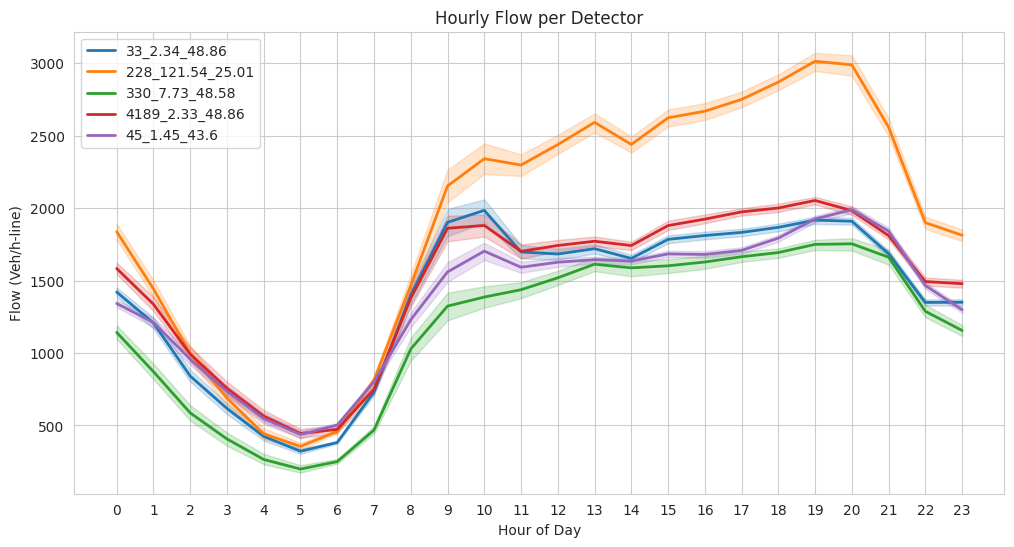

In [ ]:
# hourly flow per detectors

detid = (df_paris.select('sensor_id')
         .unique()
         .sample(n=5,with_replacement = False)
         .to_series()
         .to_list()

         )

plt.figure(figsize = (12,6))

for id in detid:
  df = df_paris.filter (pl.col('sensor_id') == id)
  sns.lineplot(data = df, x = 'hour', y = 'flow', label = id ,linewidth= 2)


plt.xlabel('Hour of Day')
plt.xticks(range(0,24))
plt.ylabel('Flow (Veh/h-line)')
plt.title('Hourly Flow per Detector')
plt.legend(loc = 'upper left')


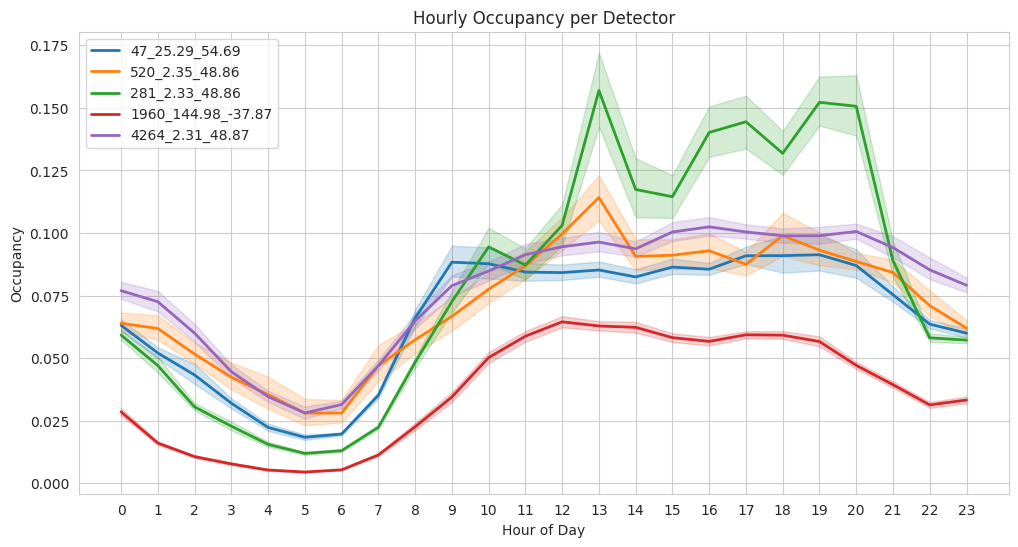

In [ ]:
detid = (df_paris.select('sensor_id')
         .unique()
         .sample(n=5,with_replacement = False)
         .to_series()
         .to_list()

         )

plt.figure(figsize = (12,6))

for id in detid:
  df = df_paris.filter (pl.col('sensor_id') == id)
  sns.lineplot(data = df, x = 'hour', y = 'occ', label = id ,linewidth= 2)


plt.xlabel('Hour of Day')
plt.xticks(range(0,24))
plt.ylabel('Occupancy')
plt.title('Hourly Occupancy per Detector')
plt.legend(loc = 'upper left')

In [ ]:
df_paris = df_paris.with_columns ([

                                  pl.when(pl.col('hour').is_between(6,11)).then(pl.lit('morning'))
                                  .when(pl.col('hour').is_between(12,16)).then(pl.lit('afternoon'))
                                 .when( pl.col('hour').is_between(17,20)).then(pl.lit('evening'))
                                  .when(pl.col('hour').is_between(0,5)).then(pl.lit('night'))
                                  .otherwise(pl.lit('late_night')).alias('time_status')
])


Text(0.5, 1.0, 'Traffic Flow Across Different Periods of the Day')

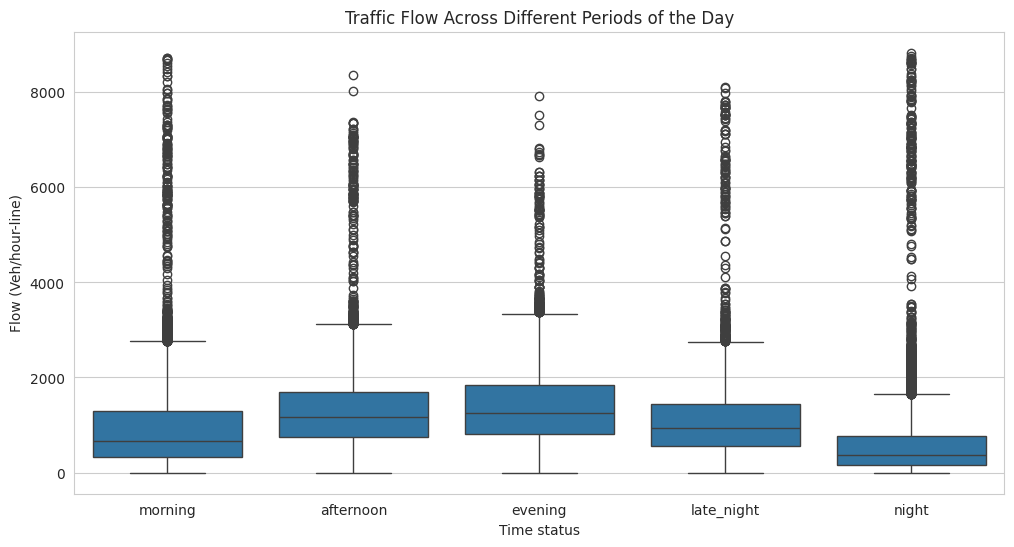

In [ ]:
df_paris_pd = df_paris.select (['flow','time_status']).to_pandas().sample(frac = 0.05,random_state = 42)
plt.figure (figsize = (12,6))
time_order = ["morning", "afternoon", "evening", "late_night", "night"]
sns.boxplot(df_paris_1, x = 'time_status',y = 'flow',order = time_order)
plt.xlabel('Time status')
plt.ylabel('Flow (Veh/hour-line)')
plt.title ('Traffic Flow Across Different Periods of the Day')

Text(0.5, 1.0, 'Traffic Flow Across the Week')

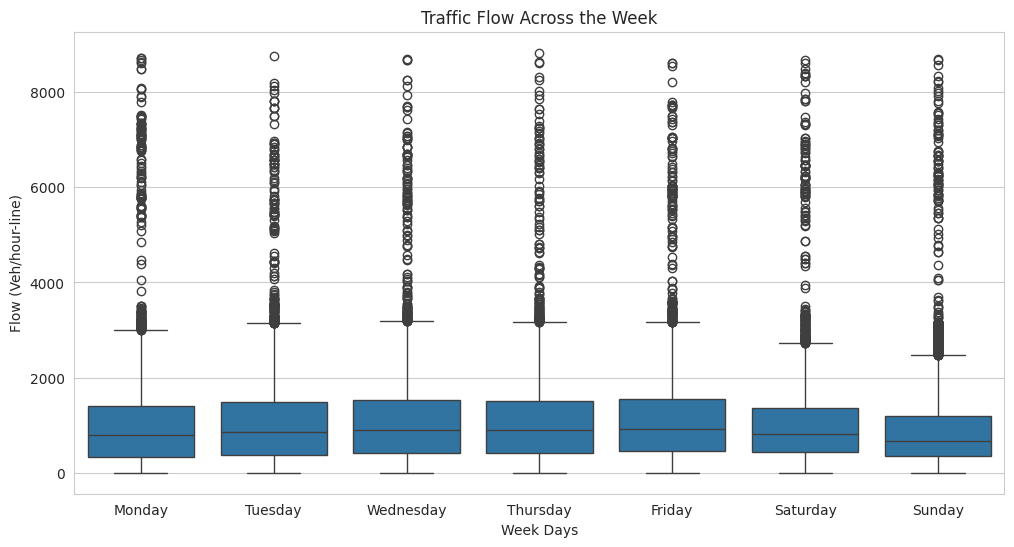

In [ ]:
plt.figure (figsize = (12,6))
df_paris_pd = df_paris.select (['flow','date']).to_pandas().sample(frac = 0.05,random_state = 42)
time_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',]
sns.boxplot(df_paris_pd, x = df_paris_pd['date'].dt.strftime('%A'),y = 'flow',order = time_order)
plt.xlabel('Week Days')
plt.ylabel('Flow (Veh/hour-line)')
plt.title ('Traffic Flow Across the Week')

In [ ]:
hourly_paris = df_paris.group_by(['is_weekend','hour']).agg([
    pl.col('flow').mean().alias('flow_mean')
]).sort (['is_weekend','hour']).with_columns(
    pl.when(pl.col('is_weekend') == False).then(pl.lit('Mon-Fri'))
    .otherwise(pl.lit('Sat-Sun')).alias('Dayname')
)

Text(0.5, 1.0, 'Weekday Vs Weekend Flow pattern (Paris) ')

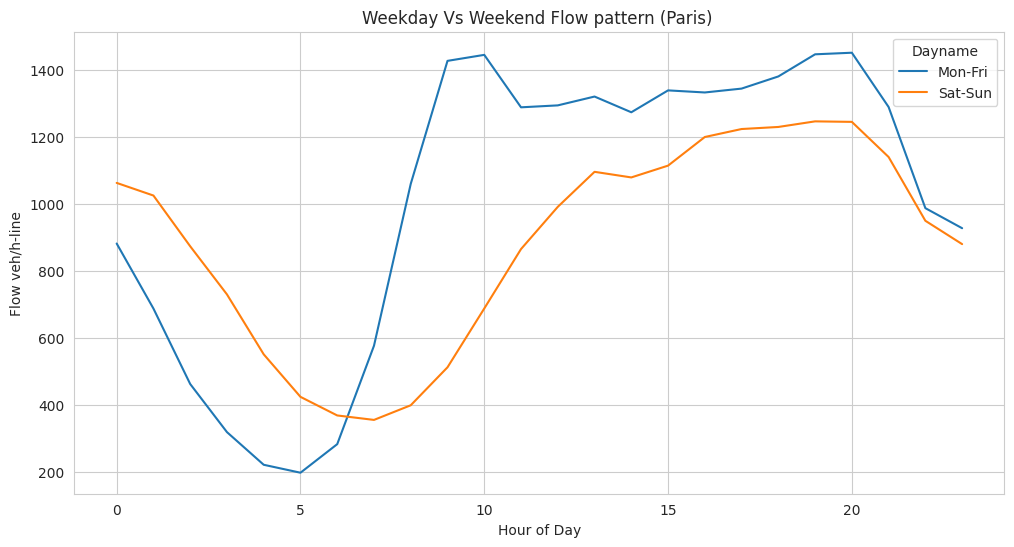

In [ ]:
plt.figure(figsize = (12,6))

sns.lineplot(hourly_paris,x = 'hour',y = 'flow_mean', hue='Dayname')
plt.xlabel('Hour of Day')
plt.ylabel('Flow veh/h-line')
plt.title('Weekday Vs Weekend Flow pattern (Paris) ')


In [51]:
geo_paris = df_paris.group_by (['sensor_id']).agg([
    pl.col('flow').mean().alias('flow_mean')
])

geo_paris = (geo_paris.join(df_paris.select(['long','lat','sensor_id']).unique(),
                           on = 'sensor_id',
                           how = 'inner')
)

In [55]:
import plotly.express as px

fig = px.scatter_mapbox(
    geo_paris,
    lat = 'lat',
    lon = 'long',
    color = 'flow_mean',
    size = 'flow_mean',
    color_continuous_scale='turbo',
    zoom = 5,
    height = 850,
    hover_name = 'sensor_id',
    hover_data = {'flow_mean':True}

)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="UTD-19: Average Flow per Detector (Paris)")
fig.show()


# **Zurich**

In [56]:
df_zurich = db.sql ("""
SELECT *
FROM DATA_FINAL
WHERE city = 'zurich'
""").pl()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [92]:
df_zurich.describe()

statistic,date,month,day,weekday,is_weekend,hour,minute,detid,city,fclass,road,flow,occ,error,long,lat
str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64
"""count""","""3508977""",3.508977e6,3.508977e6,3.508977e6,3.508977e6,3.508977e6,3.508977e6,"""3508977""","""3508977""","""3508977""","""3438438""",3.508977e6,3.508977e6,3.508977e6,3.508977e6,3.508977e6
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""70539""",0.0,0.0,0.0,0.0,0.0
"""mean""","""2015-10-29 12:01:05.896590""",10.142948,24.570262,3.001005,0.285895,11.503829,28.508488,null,null,null,null,209.874006,0.10101,0.002121,8.530156,47.439269
"""std""",null,0.35002,9.754993,2.000165,0.45184,6.920353,17.294436,null,null,null,null,204.599032,0.164203,0.046007,0.028065,0.359544
"""min""","""2015-10-26 00:03:00""",10.0,1.0,0.0,0.0,0.0,0.0,"""K101D11""","""zurich""","""motorway_link""","""Aargauerstrasse""",0.0,0.0,0.0,8.4281927,47.332382
"""25%""","""2015-10-27 18:03:00""",10.0,26.0,1.0,0.0,6.0,15.0,null,null,null,null,40.0,0.008333,0.0,8.517923,47.371092
"""50%""","""2015-10-29 12:03:00""",10.0,28.0,3.0,0.0,12.0,30.0,null,null,null,null,160.0,0.033889,0.0,8.532226,47.38175
"""75%""","""2015-10-31 06:00:00""",10.0,30.0,5.0,1.0,18.0,45.0,null,null,null,null,320.0,0.111667,0.0,8.544776,47.39707
"""max""","""2015-11-01 23:57:00""",11.0,31.0,6.0,1.0,23.0,57.0,"""K8D20""","""zurich""","""trunk_link""","""Zürichbergstrasse""",6240.0,28.335556,1.0,8.662607,49.884524


In [58]:
df_zurich.null_count()

date,month,day,weekday,is_weekend,hour,minute,detid,city,fclass,road,flow,occ,error,long,lat
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,70539,0,0,0,0,0


In [73]:
df_zurich_1 = df_zurich.with_columns(
    pl.col("date").dt.date().alias("date_only")
)

hourly_df = df_zurich_1.group_by(['detid','date_only','hour']).agg([
    pl.col('flow').mean().alias('flow_mean'),
    pl.col('occ').sum().alias('occ_sum')
]).sort(['detid','date_only','hour'])

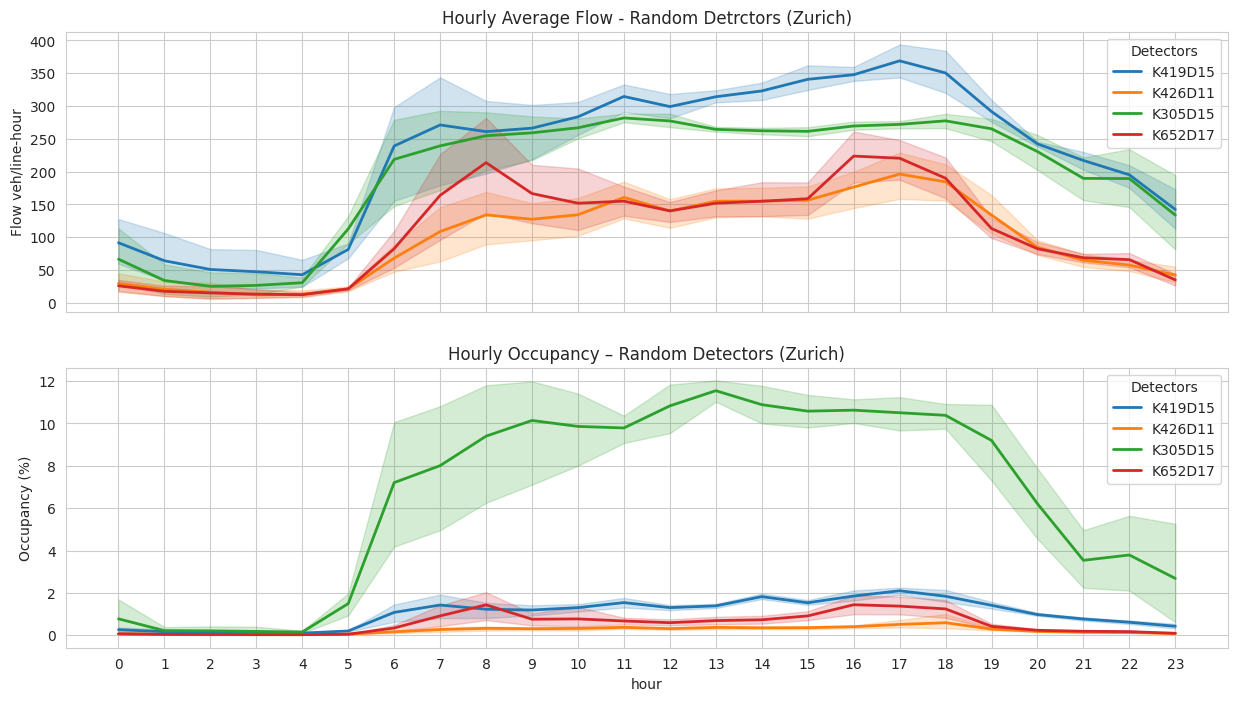

In [ ]:
# @title Default title text
detid = (
hourly_df.select('detid')
.unique()
.sample(n=4,with_replacement = False)
.to_series()
.to_list()
)
fig, axes = plt.subplots(2,1,figsize=(15,8),sharex = True)
# Flow -----
for det in detid:
  df = hourly_df.filter (pl.col('detid') == det).sort('hour')
  sns.lineplot(data = df, x = 'hour', y = 'flow_mean'
  ,label = det, linewidth = 2,ax = axes[0])

plt.xticks (range(0,24))
axes[0].set_title('Hourly Average Flow - Random Detrctors (Zurich)')
axes[0].set_ylabel('Flow veh/line-hour')
axes[0].legend(title='Detectors')

# Occupancy -----
for det in detid:
  df = hourly_df.filter (pl.col('detid') == det)
  df = df.sort('hour')
  plt.subplot(2,1,2)
  sns.lineplot(data = df, x = 'hour', y = 'occ_sum'
  ,label = det, linewidth = 2,ax = axes[1])

axes[1].set_title('Hourly Occupancy – Random Detectors (Zurich)')
axes[1].set_ylabel('Occupancy (%)')
axes[1].legend(title='Detectors')

**Morning peak**: starts rising at 6:00, reaches a strong peak between 7:00-9:00 depend on detectors.                            

**Evening peak**: peak between 16:00 - 18:00, some extending till 19:00.                     

**Green Line** : this detector is located on a segment with consistently heavier congestion

Text(0.5, 1.0, 'Hourly Flow Distribution per Day of Week - Zurich')

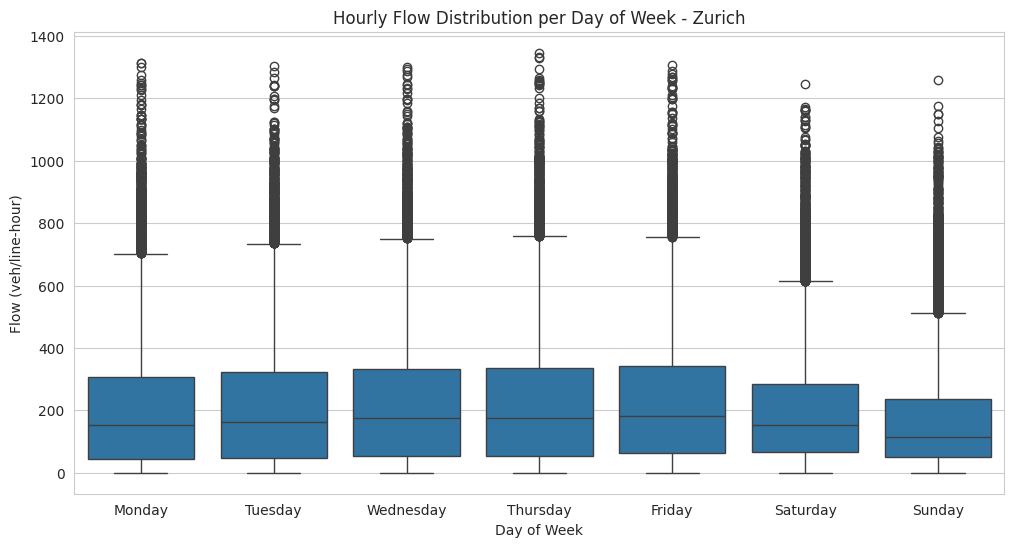

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data=hourly_df, x= hourly_df['date'].dt.strftime('%A'), y = 'flow_mean')
plt.xlabel('Day of Week')
plt.ylabel('Flow (veh/line-hour)')
plt.title ('Hourly Flow Distribution per Day of Week - Zurich')

- Saturday and Sunday have lower mean flow compare to rest of the week. Also Saturday is slightly higher than sunday but lower than week day.    

- Monday to Friday show similar medians and ranges which indicates stable commuter patterns with same morning and evening peaks.


In [91]:
df_det = hourly_df.filter(pl.col('detid')== 'K101D11').with_columns(pl.col('date_only').dt.strftime('%A').alias('Weekday'))

In [77]:
df_pivot =  df_det.filter(pl.col('detid')== 'K101D11').pivot(
    index='Weekday',
    on="hour",
    values="flow_mean"
)

In [78]:
pdf = df_pivot.to_pandas()
pdf = pdf.set_index("Weekday")
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pdf = pdf.loc[order]

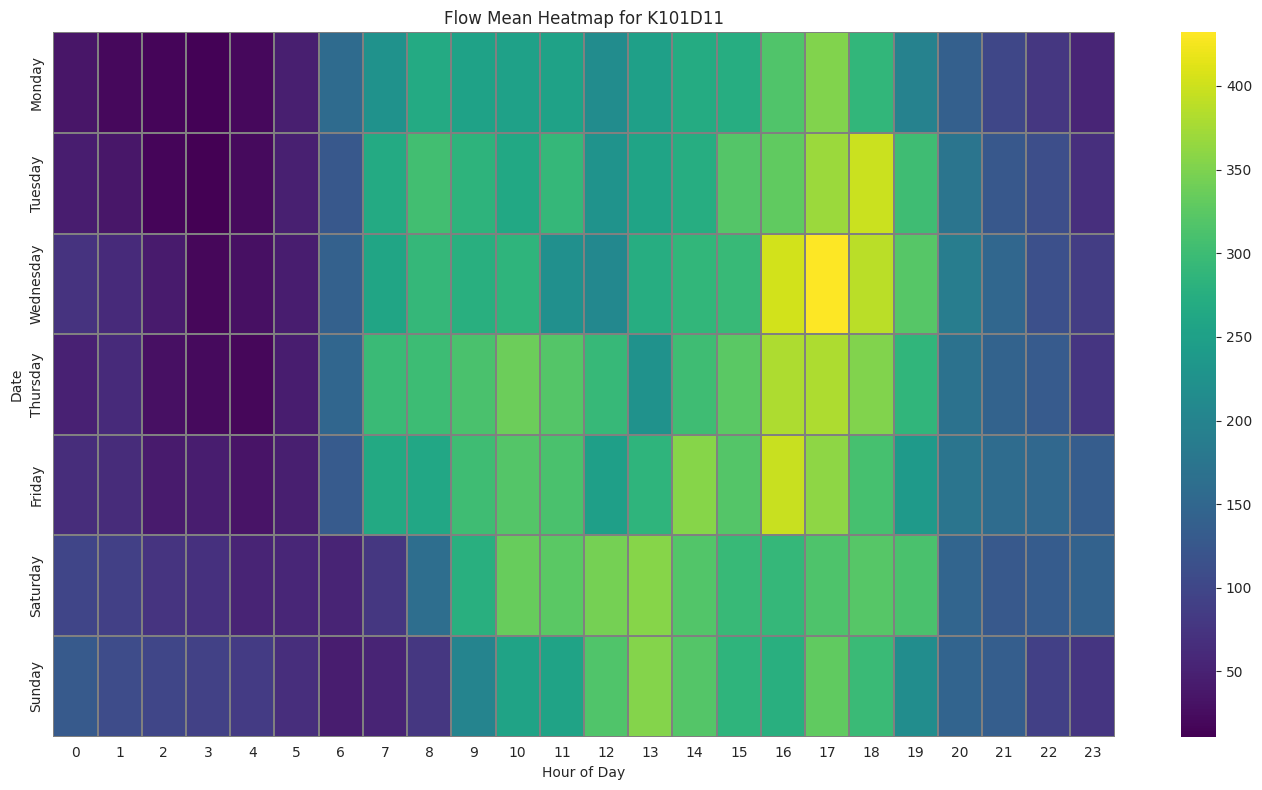

In [79]:
plt.figure(figsize=(14, 8))

sns.heatmap(
    pdf,
    cmap="viridis",
    linewidths=0.1,
    linecolor="gray"
)

plt.title("Flow Mean Heatmap for K101D11")
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

In [87]:
df_week = df_zurich.group_by(['is_weekend','hour']).agg([
    pl.col('flow').mean().alias('flow_mean'),
    pl.col('occ').mean().alias('occ_mean')
]).sort (['is_weekend','hour']).with_columns(
    pl.when(pl.col('is_weekend') == False).then(pl.lit('Mon-Fri'))
    .otherwise(pl.lit('Sat-Sun')).alias('Dayname')
)

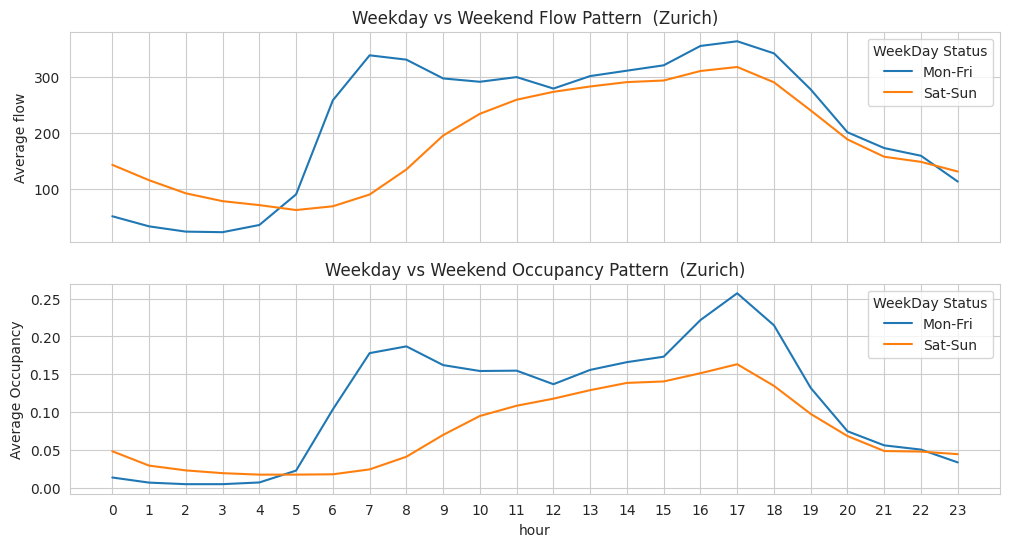

In [88]:

fig, axes = plt.subplots (2,1,figsize=(12,6),sharex = True)
sns.lineplot(data = df_week, x = 'hour', y = 'flow_mean',hue = 'Dayname',ax = axes[0])
#axes.xlabel ('Hour of day')
plt.xticks(range(0,24))
axes[0].set_ylabel('Average flow')
axes[0].set_title('Weekday vs Weekend Flow Pattern  (Zurich)')
axes[0].legend(title = 'WeekDay Status')


sns.lineplot(data = df_week, x = 'hour', y = 'occ_mean',hue = 'Dayname',ax = axes[1])
plt.subplot(2,1,2)
#axes.xlabel ('Hour of day')

axes[1].set_ylabel('Average Occupancy')
axes[1].set_title('Weekday vs Weekend Occupancy Pattern  (Zurich)')
axes[1].legend(title = 'WeekDay Status')


In [90]:
df_2 = (hourly_df.group_by ('detid')
.agg(
    pl.col('flow_mean').mean().alias('Avg_flow'),
    pl.col('occ_sum').mean().alias('Avg_occ')
)

        )
df_geo = (
    df_2.join(
        df_zurich.select(['detid','long','lat']).unique(),
        on = 'detid',
        how = 'inner'
    )
)
df_f = df_geo.to_pandas()
df_f

,detid,Avg_flow,Avg_occ,long,lat
0,K36D17,89.624373,1.348194,8.521080,47.379909
1,K301D15,96.718985,2.433935,8.539237,47.377370
2,K464D15,42.609023,0.801055,8.475141,47.397823
3,K478D16,230.384398,5.160503,8.499349,47.402302
4,K2D14,148.028195,7.352226,8.518765,47.374964
...,...,...,...,...,...
1040,K656D11,304.442043,2.019722,8.518964,47.358360
1041,K375D18,127.355890,0.858958,8.536258,47.385454
1042,K419D15,226.929511,1.033621,8.499435,47.377478
1043,K582D12,167.512531,0.457550,8.539817,47.385620


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_f,
    lat = 'lat',
    lon = 'long',
    color = 'Avg_flow',
    size = 'Avg_flow',
    color_continuous_scale='turbo',
    zoom = 11,
    height = 850,
    hover_name = 'detid',
    hover_data = {'Avg_flow':True, 'Avg_occ':True}

)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="UTD-19: Average Flow per Detector (Zurich)")
fig.show()


# **7. Conclusion**

***Zurich VS Paris***                           

Both cities exhibit a morning peak starting around 7:00 AM, which is consistent with typical commuting behavior. However, the evolution of traffic after the morning peak differs significantly between the two cities.

In Paris, traffic volume remains relatively high throughout the day and into the late evening, with elevated flow levels persisting until approximately 9–10 PM. This suggests a more active nighttime economy, longer social and commercial activity hours, and sustained mobility beyond standard working hours.

In contrast, Zurich shows a more pronounced decline in traffic after the evening peak. Traffic volumes decrease earlier in the evening, indicating that daily activities wind down sooner and that the city follows a more structured and time-bound mobility pattern.                    



